In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weight-height (1).csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(8555, 3)

In [7]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
8550  Female  60.483946  110.565497
8551  Female  63.423372  129.921671
8552  Female  65.584057  155.942671
8553  Female  67.429971  151.678405
8554  Female  60.921791  131.253738

[8555 rows x 3 columns]>

In [8]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


<Axes: xlabel='Gender'>

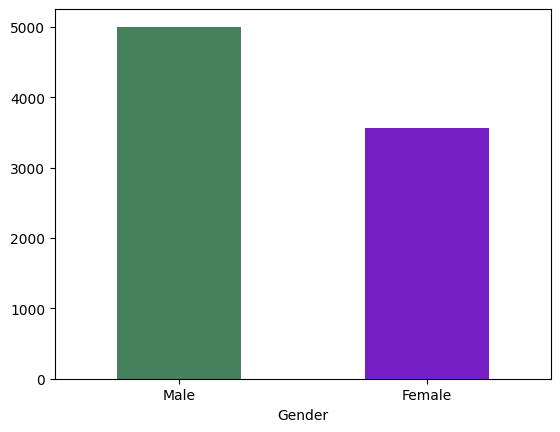

In [9]:
df["Gender"].value_counts().plot(kind="bar",color=["#46805c", "#761fc7"], rot=0)

In [12]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


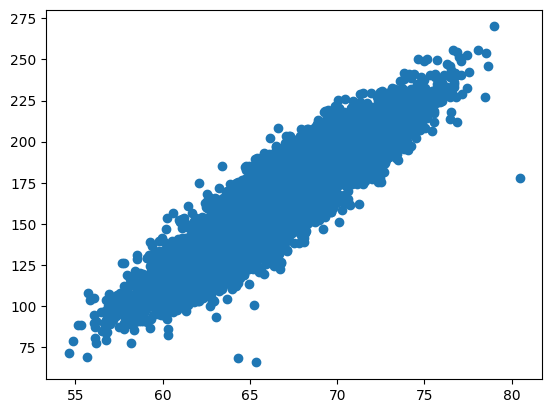

In [17]:
plt.scatter(x=df.Height,y=df.Weight)

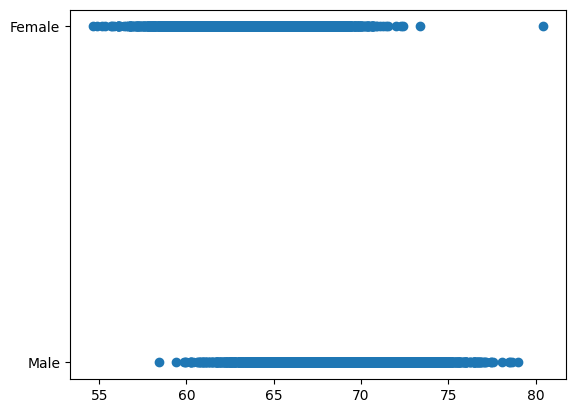

In [18]:
plt.scatter(x=df.Height, y=df.Gender)

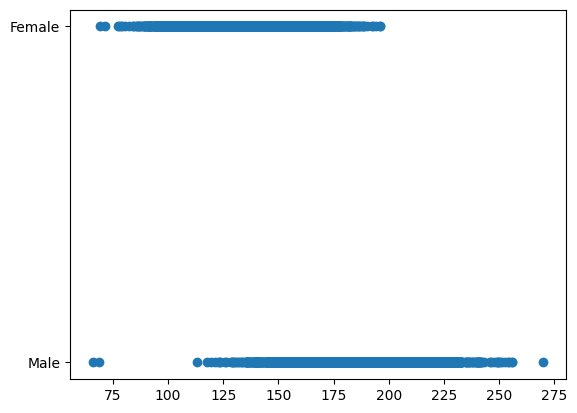

In [20]:
plt.scatter(x=df.Weight, y=df.Gender)

In [30]:
x = df[["Height"]]
y = df[["Gender"]]

In [31]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [32]:
y.head()

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [34]:
y = y.replace(["Male","Female"],[1,0])

C:\Users\h\AppData\Local\Temp\ipykernel_8196\2582843599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(["Male","Female"],[1,0])


In [36]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1
